In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option('display.max_columns', 500)


In [3]:
subjects=pd.read_csv("subjects.csv")

In [4]:
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2

,Unnamed: 0,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,1,1,0,0,0,1,0,1,1,0
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,1,1,0,0,0,1,0,1,1,0
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,343190,10,-21.9470,3.92360,-6.22580,0.133960,0.163270,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,12,0,1,0,1,0,1,0,0,0
343191,343191,10,-21.9140,2.75210,-12.27900,-0.087912,-0.083726,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,12,0,1,0,1,0,1,0,0,0
343192,343192,10,-21.8140,-2.72740,-12.70900,-0.309790,-0.200940,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,12,0,1,0,1,0,1,0,0,0
343193,343193,10,-21.7900,-3.92290,-7.27940,-0.443750,-0.259550,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,12,0,1,0,1,0,1,0,0,0


In [5]:
sampled_data=subjects2.sample(frac = 0.01)
sampled_data.drop(columns=['Unnamed: 0','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'],inplace=True)

In [76]:
X_train = sampled_data[sampled_data['subject_number']!=10].iloc[:,1:22]
X_test = sampled_data[sampled_data['subject_number']==10].iloc[:,1:22]

y_train = sampled_data[sampled_data['subject_number']!=10].iloc[:,22]
y_test = sampled_data[sampled_data['subject_number']==10].iloc[:,22]

estimators = [('normalise', StandardScaler()),
              ('KNN', KNeighborsClassifier())]

from tempfile import mkdtemp
cachedir = mkdtemp()

from sklearn.pipeline import Pipeline
pipe = Pipeline(estimators, memory = cachedir)

from sklearn.model_selection import GridSearchCV
params = {'KNN__n_neighbors':range(1,20)}

grid_search = GridSearchCV(pipe, param_grid=params, cv =5)
fittedgrid = grid_search.fit(X_train, y_train)

In [77]:
results=pd.DataFrame(fittedgrid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034577,0.002519,0.059667,0.001693,1,{'KNN__n_neighbors': 1},0.915605,0.9104,0.921474,0.915994,0.935170,0.919692,0.008458,1
1,0.012738,0.003694,0.088649,0.019883,2,{'KNN__n_neighbors': 2},0.875796,0.8720,0.887821,0.883683,0.886548,0.881144,0.006210,3
2,0.009753,0.003195,0.068994,0.003571,3,{'KNN__n_neighbors': 3},0.883758,0.8800,0.886218,0.885299,0.897893,0.886605,0.006001,2
3,0.007908,0.000127,0.068484,0.001082,4,{'KNN__n_neighbors': 4},0.861465,0.8624,0.883013,0.869144,0.871961,0.869579,0.007808,4
4,0.007906,0.000067,0.070307,0.001260,5,{'KNN__n_neighbors': 5},0.861465,0.8560,0.876603,0.864297,0.880065,0.867652,0.009155,5
5,0.007775,0.000162,0.071228,0.001516,6,{'KNN__n_neighbors': 6},0.840764,0.8448,0.854167,0.856220,0.868720,0.852875,0.009747,6
6,0.007771,0.000134,0.072031,0.001220,7,{'KNN__n_neighbors': 7},0.845541,0.8400,0.854167,0.861066,0.863857,0.852875,0.009039,6
7,0.008467,0.000979,0.074671,0.002889,8,{'KNN__n_neighbors': 8},0.832803,0.8224,0.838141,0.854604,0.854133,0.840347,0.012458,8
8,0.007961,0.000152,0.073690,0.000907,9,{'KNN__n_neighbors': 9},0.826433,0.8224,0.825321,0.849758,0.849271,0.834565,0.012204,9
9,0.007995,0.000158,0.074766,0.000975,10,{'KNN__n_neighbors': 10},0.816879,0.8032,0.807692,0.840065,0.839546,0.821394,0.015583,10


In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.8683385579937304


In [6]:
subjects2.drop(columns=['Unnamed: 0','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'],inplace=True)

In [6]:
subjects2

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,12,0,1,0,1,0,1,0,0,0


In [86]:
X_train = subjects2[subjects2['subject_number']!=10].iloc[:,1:22]
X_test = subjects2[subjects2['subject_number']==10].iloc[:,1:22]

y_train = subjects2[subjects2['subject_number']!=10].iloc[:,22]
y_test = subjects2[subjects2['subject_number']==10].iloc[:,22]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [87]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.9184030869694272


In [328]:
sampled_data

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
2703,1,-9.6831,0.31881,0.860270,2.273000,-9.52040,0.43213,-0.21521,-0.87242,-0.504910,0.56366,0.54482,-0.73822,-3.12170,-9.1423,1.77210,-0.078431,-0.92813,-0.37069,0.54410,0.54991,1.0884,1,1,0,0,0,1,0,1,1,0
59952,2,-8.4829,-0.60049,-0.959310,1.531800,-9.89670,0.42673,-0.38033,-0.85929,-0.445970,-6.15270,3.91470,0.51681,-1.60090,-10.0860,3.39150,-0.233330,-1.06370,-0.37069,-10.38800,20.41000,-38.3180,8,0,0,1,0,0,0,0,0,1
155783,5,-8.5692,-0.83315,-1.011800,1.261300,-9.44190,0.36343,-0.64007,-0.75985,0.151280,6.67780,-1.90160,0.02976,-2.17060,-9.4350,1.49700,-0.825490,-0.62012,0.27586,-1.39230,4.39780,2.8163,6,0,0,1,0,1,0,0,0,1
109092,4,-8.8454,0.85735,-5.691300,-0.034833,-12.06200,-1.25970,0.26160,1.63980,1.053000,-33.09200,-21.13700,-4.03300,-0.87166,-9.2852,1.48370,0.500000,0.13347,0.72414,-21.93600,-39.22000,30.6390,5,0,1,1,0,0,1,0,1,1
323579,10,-8.5602,-0.27064,-2.708600,2.374300,-12.35100,-1.44800,0.58627,-0.42214,0.605110,-47.81000,83.96400,-6.80980,-4.70840,-12.4220,0.75388,-0.660780,-0.64271,0.65517,-3.05040,0.16542,-22.8060,4,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269142,8,-9.1341,-1.88310,0.388420,4.196900,-8.03410,4.51530,0.30056,-0.15385,-1.060900,-104.67000,-36.93500,17.18100,2.86520,10.9850,-2.50280,-0.717650,-0.64887,0.34698,83.17700,-48.52500,22.0040,10,0,1,0,1,0,1,0,0,0
114929,4,-9.1594,-1.12320,3.162100,2.904900,-9.61150,-0.75361,0.70501,-0.66604,-0.740670,-0.16756,0.18516,-0.43140,-1.55850,-7.2497,6.03330,0.341180,-0.85216,0.49353,0.18304,0.35032,-1.0829,2,1,0,0,0,1,0,1,1,0
119122,4,-9.0505,-2.02010,0.028719,1.740300,-9.75230,1.00900,0.45640,-0.67355,0.444010,-22.33600,-17.20800,-1.54570,-1.06070,-5.8868,2.32020,-0.107840,-0.69610,0.87284,-6.81700,18.48300,-9.7074,4,0,1,1,0,0,1,0,1,1
320034,10,-2.3701,-6.74700,6.677000,7.627700,0.48685,6.11100,0.55288,0.34709,-0.053045,0.19810,0.54848,-0.58665,-9.71900,0.3186,-0.14032,-0.747060,0.45380,0.43534,0.18492,0.53899,-0.3627,3,1,0,0,0,1,0,1,1,0


In [329]:
cluster_data = sampled_data.iloc[:,1:22]

In [330]:
# scaler = StandardScaler()
# scaler.fit(cluster_data)
# cluster_data = scaler.transform(cluster_data)


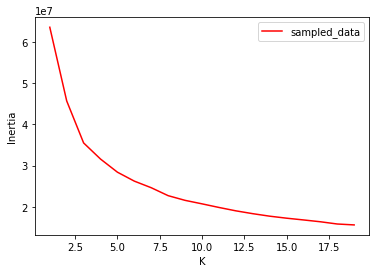

In [331]:
from sklearn.cluster import KMeans
K=range(1,20)
inertia_m = []


for k in K:    
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit(cluster_data)
    pred_labels = k_means_model.labels_
    inertia_m.append(k_means_model.inertia_)
    
plt.figure()
plt.plot(K,inertia_m,label="sampled_data", c= "red")
plt.xlabel("K");
plt.ylabel("Inertia")
plt.legend()
plt.show()

In [332]:
from sklearn.cluster import KMeans

#Specify the model
k_means_model = KMeans(n_clusters = 9)

#Fit the model to the data
k_means_model.fit(cluster_data);

In [333]:
pred_labels = k_means_model.predict(cluster_data)

pred_labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [334]:
len(pred_labels)

3432

In [335]:
sampled_data.insert(22,'clusters',pred_labels)

In [336]:
sampled_data

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),clusters,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
2703,1,-9.6831,0.31881,0.860270,2.273000,-9.52040,0.43213,-0.21521,-0.87242,-0.504910,0.56366,0.54482,-0.73822,-3.12170,-9.1423,1.77210,-0.078431,-0.92813,-0.37069,0.54410,0.54991,1.0884,4,1,1,0,0,0,1,0,1,1,0
59952,2,-8.4829,-0.60049,-0.959310,1.531800,-9.89670,0.42673,-0.38033,-0.85929,-0.445970,-6.15270,3.91470,0.51681,-1.60090,-10.0860,3.39150,-0.233330,-1.06370,-0.37069,-10.38800,20.41000,-38.3180,4,8,0,0,1,0,0,0,0,0,1
155783,5,-8.5692,-0.83315,-1.011800,1.261300,-9.44190,0.36343,-0.64007,-0.75985,0.151280,6.67780,-1.90160,0.02976,-2.17060,-9.4350,1.49700,-0.825490,-0.62012,0.27586,-1.39230,4.39780,2.8163,4,6,0,0,1,0,1,0,0,0,1
109092,4,-8.8454,0.85735,-5.691300,-0.034833,-12.06200,-1.25970,0.26160,1.63980,1.053000,-33.09200,-21.13700,-4.03300,-0.87166,-9.2852,1.48370,0.500000,0.13347,0.72414,-21.93600,-39.22000,30.6390,4,5,0,1,1,0,0,1,0,1,1
323579,10,-8.5602,-0.27064,-2.708600,2.374300,-12.35100,-1.44800,0.58627,-0.42214,0.605110,-47.81000,83.96400,-6.80980,-4.70840,-12.4220,0.75388,-0.660780,-0.64271,0.65517,-3.05040,0.16542,-22.8060,4,4,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269142,8,-9.1341,-1.88310,0.388420,4.196900,-8.03410,4.51530,0.30056,-0.15385,-1.060900,-104.67000,-36.93500,17.18100,2.86520,10.9850,-2.50280,-0.717650,-0.64887,0.34698,83.17700,-48.52500,22.0040,8,10,0,1,0,1,0,1,0,0,0
114929,4,-9.1594,-1.12320,3.162100,2.904900,-9.61150,-0.75361,0.70501,-0.66604,-0.740670,-0.16756,0.18516,-0.43140,-1.55850,-7.2497,6.03330,0.341180,-0.85216,0.49353,0.18304,0.35032,-1.0829,4,2,1,0,0,0,1,0,1,1,0
119122,4,-9.0505,-2.02010,0.028719,1.740300,-9.75230,1.00900,0.45640,-0.67355,0.444010,-22.33600,-17.20800,-1.54570,-1.06070,-5.8868,2.32020,-0.107840,-0.69610,0.87284,-6.81700,18.48300,-9.7074,4,4,0,1,1,0,0,1,0,1,1
320034,10,-2.3701,-6.74700,6.677000,7.627700,0.48685,6.11100,0.55288,0.34709,-0.053045,0.19810,0.54848,-0.58665,-9.71900,0.3186,-0.14032,-0.747060,0.45380,0.43534,0.18492,0.53899,-0.3627,4,3,1,0,0,0,1,0,1,1,0


In [337]:
X_train = sampled_data[sampled_data['subject_number']!=10].iloc[:,1:23]
X_test = sampled_data[sampled_data['subject_number']==10].iloc[:,1:23]

y_train = sampled_data[sampled_data['subject_number']!=10].iloc[:,23]
y_test = sampled_data[sampled_data['subject_number']==10].iloc[:,23]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [338]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.8746355685131195


In [339]:
X_train1 = sampled_data[sampled_data['subject_number']!=10].iloc[:,24:]
X_test1 = sampled_data[sampled_data['subject_number']==10].iloc[:,24:]

y_train1 = sampled_data[sampled_data['subject_number']!=10].iloc[:,22]
y_test1 = sampled_data[sampled_data['subject_number']==10].iloc[:,22]

In [340]:
y_train1

2703      4
59952     4
155783    4
109092    4
1579      4
         ..
247708    4
269142    8
114929    4
119122    4
262806    4
Name: clusters, Length: 3089, dtype: int32

In [341]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train1, y_train1)
print(KNN_model.score(X_test1, y_test1))

0.7521865889212828


In [342]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X_train1, y_train1)
print(my_random_forest.score(X_test1,y_test1))


0.7521865889212828


In [243]:
from sklearn.ensemble import GradientBoostingClassifier


GB_model = GradientBoostingClassifier()
GB_model.fit(X_train1, y_train1)
print(f"Gradient boost score: {GB_model.score(X_test1,y_test1)}")

Gradient boost score: 0.7739938080495357


In [244]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1), n_estimators=50)
AdaBoost_model.fit(X_train1, y_train1)
print(f"Ada boost score: {AdaBoost_model.score(X_test1,y_test1)}")

Ada boost score: 0.7739938080495357


In [245]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_train1, y_train1)
print(f"XG Boost score: {XGB_model.score(X_test1,y_test1)}")

XG Boost score: 0.7739938080495357


In [7]:
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2.drop(columns=['Unnamed: 0','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'],inplace=True)
subjects2

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,12,0,1,0,1,0,1,0,0,0


In [38]:
cluster_data2 = subjects2.iloc[:,1:22]

In [39]:
cluster_data2

,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis)
0,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020
1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363
2,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020
3,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198
4,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390
343191,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600
343192,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500
343193,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460


In [276]:
k_means_model = KMeans(n_clusters = 12)

#Fit the model to the data
k_means_model.fit(cluster_data2);

In [277]:
pred_labels = k_means_model.predict(cluster_data2)

pred_labels

array([0, 0, 0, ..., 9, 0, 0], dtype=int32)

In [279]:
subjects2.insert(22,'clusters',pred_labels)

In [280]:
X_train = subjects2[subjects2['subject_number']!=10].iloc[:,1:23]
X_test = subjects2[subjects2['subject_number']==10].iloc[:,1:23]

y_train = subjects2[subjects2['subject_number']!=10].iloc[:,23]
y_test = subjects2[subjects2['subject_number']==10].iloc[:,23]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [281]:
X_train

,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),clusters
0,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.376830,-0.20965,-0.88931,-0.50884,0.563660,0.54482,-0.738220,-2.84390,-9.0618,1.81770,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0
1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.401790,-0.20965,-0.88931,-0.50884,0.568100,0.91175,-0.886280,-2.99350,-9.2048,1.51890,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,0
2,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.481410,-0.20037,-0.86867,-0.50688,0.211100,0.54835,-1.019800,-2.88460,-9.1945,1.55070,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0
3,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.429190,-0.20037,-0.86867,-0.50688,0.215650,1.28220,-1.171500,-2.92450,-9.1746,1.54130,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,0
4,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.400380,-0.20037,-0.86867,-0.50688,0.568100,0.91175,-0.886280,-2.89630,-9.2039,1.61270,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309500,-8.6500,-0.83185,-2.23280,2.7673,-8.9662,0.412700,-0.44341,-0.57974,0.48527,-0.042765,1.83530,1.425500,-0.29257,-7.4942,1.58360,-0.727450,-0.61807,-0.16595,13.300000,19.38600,46.28200,0
309501,-8.9892,-1.04290,-1.67280,3.1609,-10.0400,-0.074575,-0.44341,-0.57974,0.48527,-4.889400,0.41587,0.526530,-0.51674,-8.0277,1.23400,-0.727450,-0.61807,-0.16595,12.146000,11.72900,41.64200,0
309502,-9.4536,-1.05650,-1.77930,1.9283,-10.0480,-0.889390,-0.44341,-0.57974,0.48527,-7.779500,-0.28918,0.591380,-0.54466,-8.7792,1.08190,-0.754900,-0.57084,-0.17888,9.742700,4.79500,35.52600,0
309503,-10.1930,-1.43780,-1.77150,2.4368,-9.8005,-1.830200,-0.44341,-0.57974,0.48527,-9.203200,-1.92630,-0.085273,-0.50182,-9.1622,0.78147,-0.754900,-0.57084,-0.17888,7.355700,-0.51279,28.67200,0


In [283]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.9207183140397744


In [284]:
from sklearn.ensemble import BaggingClassifier
ensemble_of_KNN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), n_estimators=5);
ensemble_of_KNN.fit(X_scaled_train, y_train)
print(ensemble_of_KNN.score(X_scaled_test,y_test))

0.9200059364796676


same but with scaling

In [51]:
cluster_data2 = subjects2.iloc[:,1:22]

In [52]:
scaler = StandardScaler()
scaler.fit(cluster_data2 )
cluster_data2_scaled = scaler.transform(cluster_data2 )

In [53]:
from sklearn.cluster import KMeans
k_means_model = KMeans(n_clusters = 12)

k_means_model.fit(cluster_data2_scaled);
pred_labels = k_means_model.predict(cluster_data2_scaled)
subjects2.insert(22,'clusters',pred_labels)


In [54]:
X_train = subjects2[subjects2['subject_number']!=10].iloc[:,1:23]
X_test = subjects2[subjects2['subject_number']==10].iloc[:,1:23]

y_train = subjects2[subjects2['subject_number']!=10].iloc[:,23]
y_test = subjects2[subjects2['subject_number']==10].iloc[:,23]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.9142475512021372


In [8]:
data_2 = subjects2
data_2

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,12,0,1,0,1,0,1,0,0,0


In [9]:
data_2_clustering = data_2.iloc[:,1:22]

In [11]:
scaler = StandardScaler()
scaler.fit(data_2_clustering)
cluster_data2_scaled = scaler.transform(data_2_clustering)

In [12]:
from sklearn.mixture import GaussianMixture

#Build and fit the model
my_gmm = GaussianMixture(n_components=12, covariance_type='full')
my_gmm.fit(cluster_data2_scaled)

#Getting the labels
labels = my_gmm.predict(cluster_data2_scaled)

In [13]:
data_2.insert(22,'clusters',labels)

In [14]:
data_2

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),clusters,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,3,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,3,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,3,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,3,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,3,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,8,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,5,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,8,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,8,12,0,1,0,1,0,1,0,0,0


In [15]:
X_train = data_2[data_2['subject_number']!=10].iloc[:,1:23]
X_test = data_2[data_2['subject_number']==10].iloc[:,1:23]

y_train = data_2[data_2['subject_number']!=10].iloc[:,23]
y_test = data_2[data_2['subject_number']==10].iloc[:,23]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [16]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.9325615909765509


In [3]:
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2.drop(columns=['Unnamed: 0','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'],inplace=True)


In [4]:
X_train = subjects2[subjects2['subject_number']!=10].iloc[:,1:22]
y_train = subjects2[subjects2['subject_number']!=10].iloc[:,22]
X_test = subjects2[subjects2['subject_number']==10].iloc[:,1:22]
y_test = subjects2[subjects2['subject_number']==10].iloc[:,22]

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
my_pca = PCA()
my_pca.fit(X_scaled_train)
X_scaled_train = my_pca.transform(X_scaled_train)
X_scaled_test = my_pca.transform(X_scaled_test)



In [7]:
from sklearn.mixture import GaussianMixture

#Build and fit the model
my_gmm = GaussianMixture(n_components=12, covariance_type='full')
my_gmm.fit(X_scaled_train)

#Getting the labels
train_labels = my_gmm.predict(X_scaled_train)
test_labels = my_gmm.predict(X_scaled_test)

In [8]:
X_train['clusters'] = train_labels
X_test['clusters'] = test_labels

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [10]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.8406648857227664


In [31]:
data_3 = subjects2
data_3 = data_3.sample(frac=0.1)
data_3_clustering = data_3.iloc[:,1:22]

In [32]:
from sklearn.cluster import AgglomerativeClustering

agg_clus = AgglomerativeClustering(n_clusters=12, linkage='average').fit(data_3_clustering)

In [33]:
labels = agg_clus.labels_
data_3.insert(22,'clusters',labels)

In [34]:
data_3

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),clusters,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
176892,6,-9.581800,-0.70682,-0.51625,1.31690,-9.79710,1.48160,0.014842,-0.86867,-0.605110,0.18522,0.915580,-0.157160,-3.170700,-9.1227,1.731400,0.219610,-1.073900,-0.24569,0.54036,0.17618,0.009045,2,1,1,0,0,0,1,0,1,1,0
295094,9,-5.787800,3.02780,-5.53800,0.87332,-8.41390,-4.75570,0.500930,-0.41088,-0.746560,-34.98900,-2.035400,5.049100,-0.372200,-7.9062,-0.624480,0.588240,-0.946610,0.26078,2.77430,8.13010,-37.210000,2,8,0,0,1,0,0,0,0,0,1
88918,3,-10.107000,-0.70818,0.10469,0.28628,-9.54700,1.73380,-0.614100,-0.81989,-0.251470,1.08370,-0.010837,-0.021565,0.665190,-15.5600,6.013700,-0.043137,-1.012300,-0.45690,78.00000,-27.60100,76.565000,2,7,0,1,1,0,1,0,1,1,0
314991,10,-9.502500,-0.12794,-1.75890,0.36898,-9.73600,1.65230,-0.126160,-0.67917,0.695480,0.38321,1.097100,-0.740140,-2.633800,-9.4506,-0.055861,-0.835290,-0.661190,0.24138,1.45780,2.15250,-1.075400,2,1,1,0,0,0,1,0,1,1,0
292772,9,-9.745300,-2.63350,2.08930,1.38520,-9.95020,1.01630,0.471240,-0.73171,-0.510810,0.56372,0.728310,-0.740060,0.030762,4.3087,4.871700,0.433330,0.051335,1.06470,-50.16200,28.73000,27.951000,2,7,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77464,3,-0.041672,-0.94668,9.77800,6.87190,0.54652,7.12730,0.582560,0.42402,0.096267,0.18944,0.548560,-0.297870,-3.643100,4.3997,7.970000,0.382350,0.254620,0.94828,-0.36455,-0.54806,-0.723830,2,3,1,0,0,0,1,0,1,1,0
165279,5,2.697800,0.96781,0.86605,-1.33370,4.03670,-18.11400,-0.170690,-0.81051,-0.612970,-20.09100,-80.166000,-10.196000,2.906000,-7.9422,-0.220030,-0.992160,-0.123200,-0.33405,-40.49000,-9.51350,-29.957000,2,10,0,1,0,1,0,1,0,0,0
43660,2,-8.551200,-1.22550,4.91080,2.67520,-7.46870,-6.27380,-0.014842,-0.90994,-0.145380,-0.16762,0.001676,-0.429560,-5.615400,-2.0547,7.532700,-0.719610,0.747430,0.85129,-0.35373,0.53344,-1.456500,2,2,1,0,0,0,1,0,1,1,0
106420,4,-6.693400,0.83384,-1.18810,0.50958,-13.26800,-1.08540,0.345080,-0.35272,-0.907660,-77.73500,5.364500,-2.106500,-0.742110,-9.3814,0.864270,0.735290,-0.667350,0.32543,25.02500,-28.95500,87.794000,2,5,0,1,1,0,0,1,0,1,1


In [35]:
X_train = data_3[data_3['subject_number']!=10].iloc[:,1:23]
X_test = data_3[data_3['subject_number']==10].iloc[:,1:23]

y_train = data_3[data_3['subject_number']!=10].iloc[:,23]
y_test = data_3[data_3['subject_number']==10].iloc[:,23]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.9095462581025339


In [6]:
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2.drop(columns=['Unnamed: 0','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'],inplace=True)

In [7]:
subjects2

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),magnetometer from the left-ankle sensor (Y axis),magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,0.544820,-0.73822,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,0.911750,-0.88628,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,0.719910,0.17803,0.37363,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,0.548350,-1.01980,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,0.355370,-0.37003,-0.35020,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,1.282200,-1.17150,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,0.357180,-0.18858,-0.35198,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,0.911750,-0.88628,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,-0.001887,-0.18867,-0.72017,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-18.41400,94.863000,-5.91940,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,-0.213000,14.60600,8.51390,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-26.84900,59.351000,-25.59800,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,8.618500,36.00000,-21.12600,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-30.95600,-25.745000,-3.01950,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,16.953000,7.65350,-34.39500,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,12.25600,0.060929,0.62008,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,25.375000,-29.79600,4.05460,12,0,1,0,1,0,1,0,0,0


In [9]:
X_train = subjects2[subjects2['subject_number']!=10][((column !='Label (0 for the null class)')&(column !='subject_number') for column in subjects2.columns)]
X_test = subjects2[subjects2['subject_number']==10][((column !='Label (0 for the null class)')&(column !='subject_number') for column in subjects2.columns)]

y_train = subjects2[subjects2['subject_number']!=10].iloc[:,22]
y_test = subjects2[subjects2['subject_number']==10].iloc[:,22]

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test, y_test))

0.98753339269813
